# Package import


In [1]:
from pricing_library.market import Market
from pricing_library.option import Option
from pricing_library.trinomial_tree import TrinomialTree
from pricing_library.greeks import Greeks
from pricing_library.black_scholes import BlackScholesOptionPricing
from datetime import datetime

pricing_date = datetime(2023, 9, 1)

# Pricing


## Drawing tree

Elapsed time of the __build_tree function: 0.06 seconds


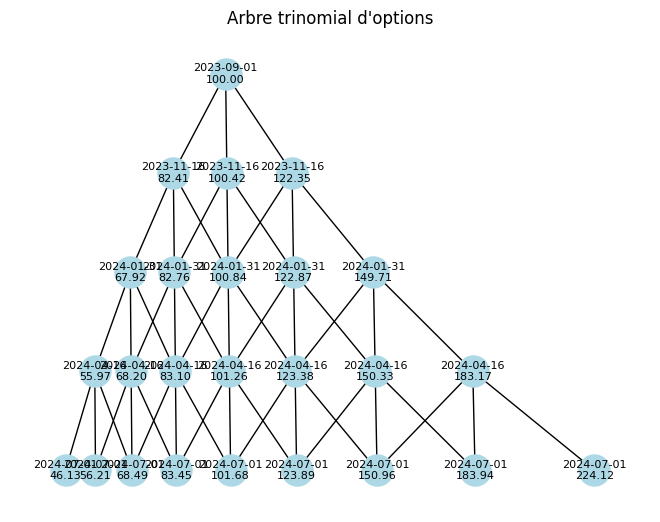

Elapsed time of the __plot_tree function: 0.69 seconds
Elapsed time of the price function: 0.75 seconds


8.883693198423552

In [2]:
opt = Option(
    option_type="call",
    exercise_type="eu",
    strike_price=101,
    maturity_date=datetime(2024, 7, 1),
)
mkt = Market(
    interest_rate=0.02,
    volatility=0.25,
    spot_price=100,
    dividend_price=0,
    dividend_ex_date=datetime(2024, 3, 1),
)

t = TrinomialTree(
    market=mkt,
    pricing_date=pricing_date,
    n_steps=4,
)
price = t.price(
    opt=opt,
    draw_tree=True,
)
price

## European Option


### Call


In [3]:
opt = Option(
    option_type="call",
    exercise_type="eu",
    strike_price=101,
    maturity_date=datetime(2024, 7, 1),
)
mkt = Market(
    interest_rate=0.02,
    volatility=0.25,
    spot_price=100,
    dividend_price=0,
    dividend_ex_date=datetime(2024, 3, 1),
)

t = TrinomialTree(
    market=mkt,
    pricing_date=pricing_date,
    n_steps=100,
)
price = t.price(
    opt=opt,
    draw_tree=False,
)
bs_pricer = BlackScholesOptionPricing(opt, pricing_date, mkt)
print(f"price: {price}, BS price: {bs_pricer.calculate_option_price()}")


Elapsed time of the __build_tree function: 0.47 seconds
Elapsed time of the price function: 0.68 seconds
price: 9.38661054605497, BS price: 9.390147529570534


### Put


In [7]:
opt = Option(
    option_type="put",
    exercise_type="eu",
    strike_price=101,
    maturity_date=datetime(2024, 7, 1),
)
mkt = Market(
    interest_rate=0.02,
    volatility=0.25,
    spot_price=100,
    dividend_price=0,
    dividend_ex_date=datetime(2024, 3, 1),
)

t = TrinomialTree(
    market=mkt,
    pricing_date=pricing_date,
    n_steps=100,
)
price = t.price(
    opt=opt,
    draw_tree=False,
)
bs_pricer = BlackScholesOptionPricing(opt, pricing_date, mkt)
print(f"price: {price}, BS price: {bs_pricer.calculate_option_price()}")

Building tree...:  11%|█         | 55/500 [00:00<00:00, 522.69it/s]

Elapsed time of the __build_tree function: 9.05 seconds
Elapsed time of the price function: 10.16 seconds
price: 8.723530253577254, BS price: 8.721671498616935


### With dividends


In [6]:
opt = Option(
    option_type="call",
    exercise_type="eu",
    strike_price=101,
    maturity_date=datetime(2024, 7, 1),
)
mkt = Market(
    interest_rate=0.02,
    volatility=0.25,
    spot_price=100,
    dividend_price=3,
    dividend_ex_date=datetime(2024, 3, 1),
)

t = TrinomialTree(
    market=mkt,
    pricing_date=pricing_date,
    n_steps=100,
)
price = t.price(
    opt=opt,
    draw_tree=False,
)
price

Building tree...:  51%|█████     | 51/100 [00:00<00:00, 493.98it/s]

Elapsed time of the __build_tree function: 0.53 seconds
Elapsed time of the price function: 0.64 seconds


7.998657950005735

## American Option


In [8]:
opt = Option(
    option_type="call",
    exercise_type="us",
    strike_price=101,
    maturity_date=datetime(2024, 7, 1),
)
mkt = Market(
    interest_rate=0.02,
    volatility=0.25,
    spot_price=100,
    dividend_price=0,
    dividend_ex_date=datetime(2024, 3, 1),
)

t = TrinomialTree(
    market=mkt,
    pricing_date=pricing_date,
    n_steps=100,
)
price = t.price(
    opt=opt,
    draw_tree=False,
)
price

Elapsed time of the __build_tree function: 1.04 seconds
Elapsed time of the price function: 1.30 seconds


9.38661054605497

# Greeks


In [9]:
opt = Option(
    option_type="call",
    exercise_type="eu",
    strike_price=101,
    maturity_date=datetime(2024, 7, 1),
)
mkt = Market(
    interest_rate=0.02,
    volatility=0.25,
    spot_price=100,
    dividend_price=0,
    dividend_ex_date=datetime(2024, 3, 1),
)

bs_pricer = BlackScholesOptionPricing(opt, pricing_date, mkt)

## Delta

$$\Delta=\frac{\partial V}{\partial S}$$


In [17]:
d = Greeks.delta(mkt=mkt, n_steps=500, pricing_date=pricing_date, opt=opt, h=0.01)
print(f"Delta: {d}, BS : {bs_pricer.calculate_delta()}")

Elapsed time of the __build_tree function: 4.26 seconds


## Gamma

$$\Gamma=\frac{\partial^2 V}{\partial S^2}$$


In [16]:
g = Greeks.gamma(mkt=mkt, n_steps=500, pricing_date=pricing_date, opt=opt, h=0.01)
print(f"Gamma: {g}, BS : {bs_pricer.calculate_gamma()}")

Elapsed time of the __build_tree function: 6.79 seconds
Elapsed time of the price function: 7.79 seconds


Elapsed time of the __build_tree function: 5.27 seconds
Elapsed time of the price function: 5.96 seconds


Elapsed time of the __build_tree function: 5.09 seconds
Elapsed time of the price function: 6.16 seconds
Gamma: 0.00254457327660651, BS : 0.01730651790514905


## Vega

$$\nu=\frac{\partial V}{\partial \sigma}$$


In [15]:
v = Greeks.vega(mkt=mkt, n_steps=500, pricing_date=pricing_date, opt=opt, h=0.01)
print(f"Vega: {v}, BS : {bs_pricer.calculate_vega()}")

Building tree...:  10%|█         | 52/500 [00:00<00:00, 517.01it/s]

Elapsed time of the __build_tree function: 6.84 seconds
Elapsed time of the price function: 8.06 seconds


Elapsed time of the __build_tree function: 4.18 seconds
Elapsed time of the price function: 6.01 seconds
Vega: 36.03292501516254, BS : 36.035489336748704
